## 1. Importación de Librerías

In [19]:
# Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Procesamiento de imágenes
from PIL import Image
import cv2

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Guardar modelo
import joblib

# Configuración de visualización
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('whitegrid')

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 2. Carga de Datos

Cargamos las imágenes de las 5 vocales desde sus respectivas carpetas.

In [20]:
def cargar_imagenes(carpetas=['A', 'E', 'I', 'O', 'U'], tamaño=(28, 28)):
    """
    Carga y preprocesa imágenes de vocales.
    
    Args:
        carpetas: Lista de carpetas con las vocales
        tamaño: Tamaño al que se redimensionarán las imágenes
    
    Returns:
        X: Array de imágenes procesadas
        y: Array de etiquetas
        etiquetas_nombres: Diccionario de mapeo
    """
    imagenes = []
    etiquetas = []
    etiquetas_nombres = {0: 'A', 1: 'E', 2: 'I', 3: 'O', 4: 'U'}
    
    print("Cargando imágenes...\n")
    
    for idx, carpeta in enumerate(carpetas):
        ruta_carpeta = Path(carpeta)
        archivos = list(ruta_carpeta.glob('*.png')) + list(ruta_carpeta.glob('*.jpg'))
        
        print(f"  Vocal {carpeta}: {len(archivos)} imágenes")
        
        for archivo in archivos:
            try:
                # Leer imagen
                img = cv2.imread(str(archivo))
                
                # Convertir a escala de grises
                img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                
                # Redimensionar
                img_resized = cv2.resize(img_gray, tamaño)
                
                # Normalizar (0-1)
                img_normalized = img_resized / 255.0
                
                # Aplanar a vector
                img_flatten = img_normalized.flatten()
                
                imagenes.append(img_flatten)
                etiquetas.append(idx)
                
            except Exception as e:
                print(f"Error cargando {archivo}: {e}")
    
    X = np.array(imagenes)
    y = np.array(etiquetas)
    
    print(f"\nTotal de imágenes cargadas: {len(X)}")
    print(f"Forma de X: {X.shape}")
    print(f"Forma de y: {y.shape}")
    
    return X, y, etiquetas_nombres

# Cargar datos
X, y, etiquetas_nombres = cargar_imagenes()

Cargando imágenes...

  Vocal A: 100 imágenes
  Vocal E: 100 imágenes
  Vocal E: 100 imágenes
  Vocal I: 100 imágenes
  Vocal I: 100 imágenes
  Vocal O: 106 imágenes
  Vocal U: 104 imágenes
  Vocal O: 106 imágenes
  Vocal U: 104 imágenes

Total de imágenes cargadas: 510
Forma de X: (510, 784)
Forma de y: (510,)

Total de imágenes cargadas: 510
Forma de X: (510, 784)
Forma de y: (510,)


## 3. Visualización de Muestras

Visualizamos algunas imágenes de cada vocal para verificar la carga correcta.

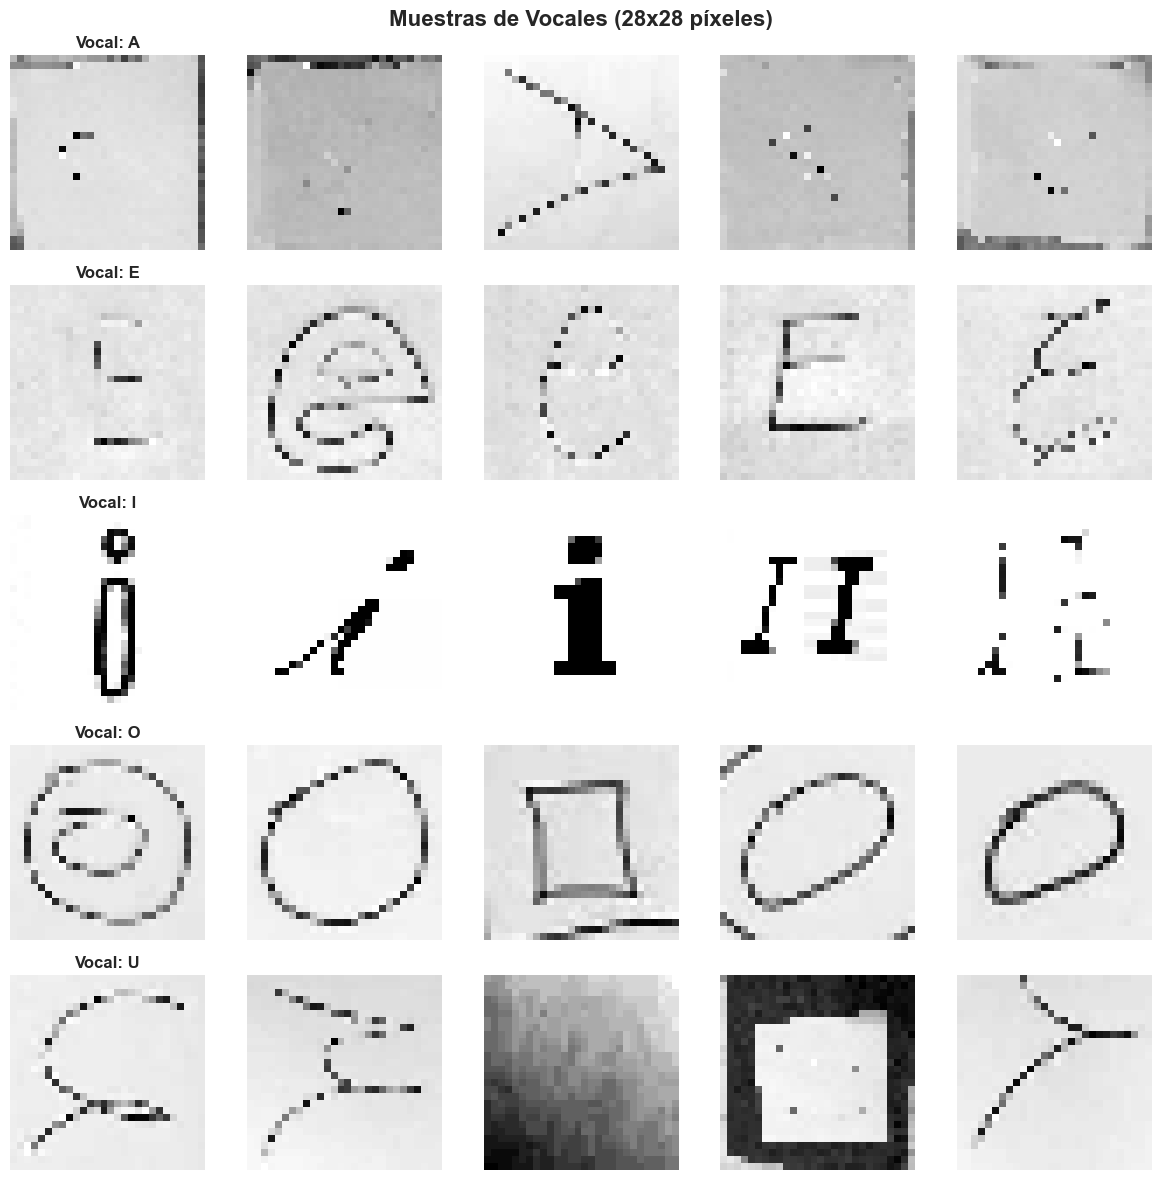

Visualización completada


In [21]:
# Visualizar muestras aleatorias de cada vocal
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
fig.suptitle('Muestras de Vocales (28x28 píxeles)', fontsize=16, fontweight='bold')

for i in range(5):
    # Obtener índices de la vocal actual
    indices = np.where(y == i)[0]
    
    # Seleccionar 5 muestras aleatorias
    muestras = np.random.choice(indices, 5, replace=False)
    
    for j, idx in enumerate(muestras):
        # Reshape a imagen 28x28
        img = X[idx].reshape(28, 28)
        
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].axis('off')
        
        if j == 0:
            axes[i, j].set_title(f"Vocal: {etiquetas_nombres[i]}", fontweight='bold')

plt.tight_layout()
plt.show()

print("Visualización completada")

## 4. Análisis de Distribución de Datos

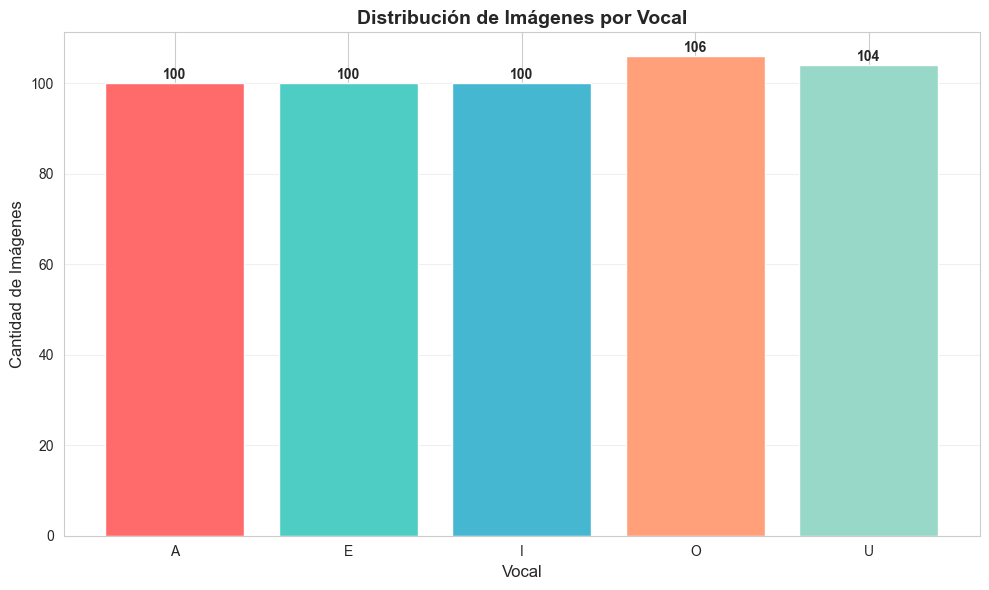


Distribución de datos:
   A: 100 imágenes (19.6%)
   E: 100 imágenes (19.6%)
   I: 100 imágenes (19.6%)
   O: 106 imágenes (20.8%)
   U: 104 imágenes (20.4%)


In [22]:
# Contar imágenes por clase
unique, counts = np.unique(y, return_counts=True)
distribucion = dict(zip([etiquetas_nombres[i] for i in unique], counts))

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(distribucion.keys(), distribucion.values(), color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8'])
plt.title('Distribución de Imágenes por Vocal', fontsize=14, fontweight='bold')
plt.xlabel('Vocal', fontsize=12)
plt.ylabel('Cantidad de Imágenes', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Agregar valores encima de las barras
for vocal, cantidad in distribucion.items():
    plt.text(vocal, cantidad + 1, str(cantidad), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nDistribución de datos:")
for vocal, cantidad in distribucion.items():
    print(f"   {vocal}: {cantidad} imágenes ({cantidad/len(y)*100:.1f}%)")

## 5. División de Datos: Entrenamiento y Prueba

Dividimos los datos en 80% entrenamiento y 20% prueba.

In [23]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("División de datos:")
print(f"   Entrenamiento: {len(X_train)} imágenes ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Prueba: {len(X_test)} imágenes ({len(X_test)/len(X)*100:.1f}%)")
print(f"\n   Forma X_train: {X_train.shape}")
print(f"   Forma X_test: {X_test.shape}")

División de datos:
   Entrenamiento: 408 imágenes (80.0%)
   Prueba: 102 imágenes (20.0%)

   Forma X_train: (408, 784)
   Forma X_test: (102, 784)


## 6. Entrenamiento de Modelos

### 6.1 Modelo 1: Regresión Logística

In [24]:
print("Entrenando Regresión Logística...\n")

# Definir modelo
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar
lr_model.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr_model.predict(X_test)

# Evaluación
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Precisión en conjunto de prueba: {acc_lr*100:.2f}%\n")

# Validación cruzada
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5)
print(f"Validación Cruzada (5-fold):")
print(f"   Precisión media: {cv_scores_lr.mean()*100:.2f}% (+/- {cv_scores_lr.std()*100:.2f}%)")
print(f"   Scores individuales: {[f'{s*100:.2f}%' for s in cv_scores_lr]}")

Entrenando Regresión Logística...

Precisión en conjunto de prueba: 84.31%

Precisión en conjunto de prueba: 84.31%

Validación Cruzada (5-fold):
   Precisión media: 83.81% (+/- 3.11%)
   Scores individuales: ['85.37%', '86.59%', '84.15%', '77.78%', '85.19%']
Validación Cruzada (5-fold):
   Precisión media: 83.81% (+/- 3.11%)
   Scores individuales: ['85.37%', '86.59%', '84.15%', '77.78%', '85.19%']


### 6.2 Modelo 2: Random Forest con Optimización de Hiperparámetros

In [25]:
print("Entrenando Random Forest con Grid Search...\n")

# Definir parámetros a optimizar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Modelo base
rf_base = RandomForestClassifier(random_state=42)

# Grid Search con validación cruzada
grid_search = GridSearchCV(
    rf_base, 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Entrenar
grid_search.fit(X_train, y_train)

# Mejor modelo
rf_model = grid_search.best_estimator_

print(f"\nMejores hiperparámetros encontrados:")
for param, valor in grid_search.best_params_.items():
    print(f"   {param}: {valor}")

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluación
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nPrecisión en conjunto de prueba: {acc_rf*100:.2f}%")
print(f"Mejor score de validación cruzada: {grid_search.best_score_*100:.2f}%")

Entrenando Random Forest con Grid Search...

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Mejores hiperparámetros encontrados:
   max_depth: 20
   min_samples_leaf: 1
   min_samples_split: 5
   n_estimators: 50

Precisión en conjunto de prueba: 81.37%
Mejor score de validación cruzada: 87.26%

Mejores hiperparámetros encontrados:
   max_depth: 20
   min_samples_leaf: 1
   min_samples_split: 5
   n_estimators: 50

Precisión en conjunto de prueba: 81.37%
Mejor score de validación cruzada: 87.26%


## 7. Comparación de Modelos


COMPARACIÓN DE MODELOS

             Modelo  Precisión  CV Score
Regresión Logística  84.313725 83.812105
      Random Forest  81.372549 87.259861


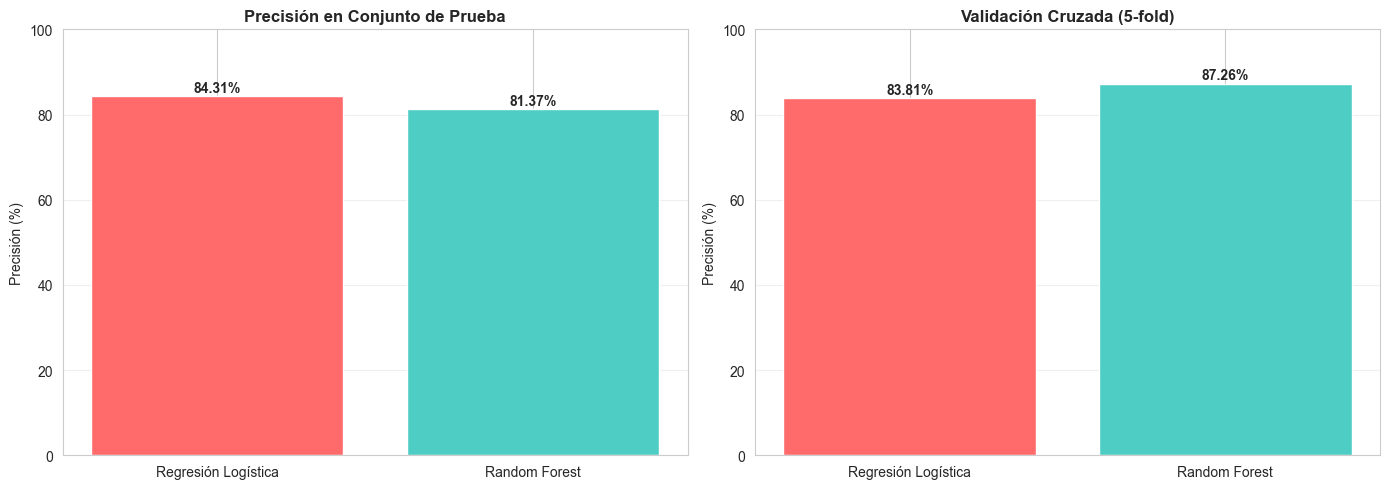


Mejor modelo: Regresión Logística


In [26]:
# Comparación de modelos
resultados = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Random Forest'],
    'Precisión': [acc_lr * 100, acc_rf * 100],
    'CV Score': [cv_scores_lr.mean() * 100, grid_search.best_score_ * 100]
})

print("\nCOMPARACIÓN DE MODELOS\n")
print(resultados.to_string(index=False))

# Gráfico comparativo
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Precisión en test
ax[0].bar(resultados['Modelo'], resultados['Precisión'], color=['#FF6B6B', '#4ECDC4'])
ax[0].set_title('Precisión en Conjunto de Prueba', fontweight='bold')
ax[0].set_ylabel('Precisión (%)')
ax[0].set_ylim(0, 100)
ax[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(resultados['Precisión']):
    ax[0].text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

# Gráfico 2: CV Score
ax[1].bar(resultados['Modelo'], resultados['CV Score'], color=['#FF6B6B', '#4ECDC4'])
ax[1].set_title('Validación Cruzada (5-fold)', fontweight='bold')
ax[1].set_ylabel('Precisión (%)')
ax[1].set_ylim(0, 100)
ax[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(resultados['CV Score']):
    ax[1].text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Seleccionar mejor modelo
mejor_modelo = rf_model if acc_rf > acc_lr else lr_model
mejor_nombre = 'Random Forest' if acc_rf > acc_lr else 'Regresión Logística'
mejor_predicciones = y_pred_rf if acc_rf > acc_lr else y_pred_lr

print(f"\nMejor modelo: {mejor_nombre}")

## 8. Análisis Estadístico: Matriz de Confusión

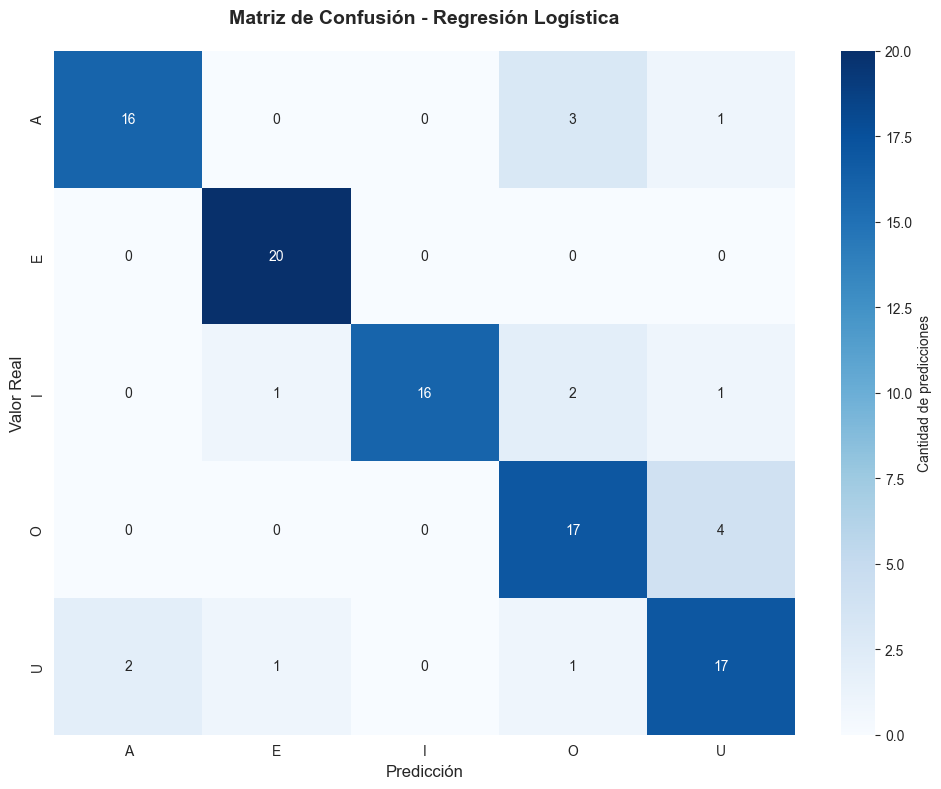


REPORTE DE CLASIFICACIÓN

              precision    recall  f1-score   support

           A       0.89      0.80      0.84        20
           E       0.91      1.00      0.95        20
           I       1.00      0.80      0.89        20
           O       0.74      0.81      0.77        21
           U       0.74      0.81      0.77        21

    accuracy                           0.84       102
   macro avg       0.86      0.84      0.85       102
weighted avg       0.85      0.84      0.84       102


ANÁLISIS DE CONFUSIONES

   A confundida con O: 3 veces
   A confundida con U: 1 veces
   I confundida con E: 1 veces
   I confundida con O: 2 veces
   I confundida con U: 1 veces
   O confundida con U: 4 veces
   U confundida con A: 2 veces
   U confundida con E: 1 veces
   U confundida con O: 1 veces


In [27]:
# Matriz de confusión
cm = confusion_matrix(y_test, mejor_predicciones)

# Visualización
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=list(etiquetas_nombres.values()),
            yticklabels=list(etiquetas_nombres.values()),
            cbar_kws={'label': 'Cantidad de predicciones'})
plt.title(f'Matriz de Confusión - {mejor_nombre}', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.tight_layout()
plt.show()

# Reporte de clasificación
print("\nREPORTE DE CLASIFICACIÓN\n")
print(classification_report(y_test, mejor_predicciones, 
                          target_names=list(etiquetas_nombres.values())))

# Análisis de confusiones
print("\nANÁLISIS DE CONFUSIONES\n")
for i in range(5):
    for j in range(5):
        if i != j and cm[i, j] > 0:
            print(f"   {etiquetas_nombres[i]} confundida con {etiquetas_nombres[j]}: {cm[i, j]} veces")

## 9. Razonamiento Probabilístico

Analizamos las probabilidades de predicción para cada clase.

In [28]:
# Obtener probabilidades
probabilidades = mejor_modelo.predict_proba(X_test)

# Mostrar ejemplos con alta confianza
print("EJEMPLOS DE PREDICCIONES CON ALTA CONFIANZA\n")

for vocal_idx in range(5):
    # Encontrar predicciones correctas de esta vocal
    indices_correctos = np.where((y_test == vocal_idx) & (mejor_predicciones == vocal_idx))[0]
    
    if len(indices_correctos) > 0:
        # Obtener el índice con mayor confianza
        confianzas = probabilidades[indices_correctos, vocal_idx]
        idx_max_confianza = indices_correctos[np.argmax(confianzas)]
        
        print(f"Vocal: {etiquetas_nombres[vocal_idx]}")
        print(f"   Predicción: {etiquetas_nombres[mejor_predicciones[idx_max_confianza]]}")
        print(f"   Probabilidades:")
        for i, prob in enumerate(probabilidades[idx_max_confianza]):
            print(f"      {etiquetas_nombres[i]}: {prob*100:6.2f}%")
        print()

EJEMPLOS DE PREDICCIONES CON ALTA CONFIANZA

Vocal: A
   Predicción: A
   Probabilidades:
      A:  99.22%
      E:   0.08%
      I:   0.00%
      O:   0.11%
      U:   0.59%

Vocal: E
   Predicción: E
   Probabilidades:
      A:   0.33%
      E:  98.03%
      I:   1.49%
      O:   0.00%
      U:   0.14%

Vocal: I
   Predicción: I
   Probabilidades:
      A:   0.01%
      E:   0.03%
      I:  99.97%
      O:   0.00%
      U:   0.00%

Vocal: O
   Predicción: O
   Probabilidades:
      A:   1.51%
      E:   0.00%
      I:   0.00%
      O:  94.28%
      U:   4.21%

Vocal: U
   Predicción: U
   Probabilidades:
      A:   0.00%
      E:   0.00%
      I:   0.00%
      O:   0.24%
      U:  99.76%



### 9.1 Visualización de Probabilidades

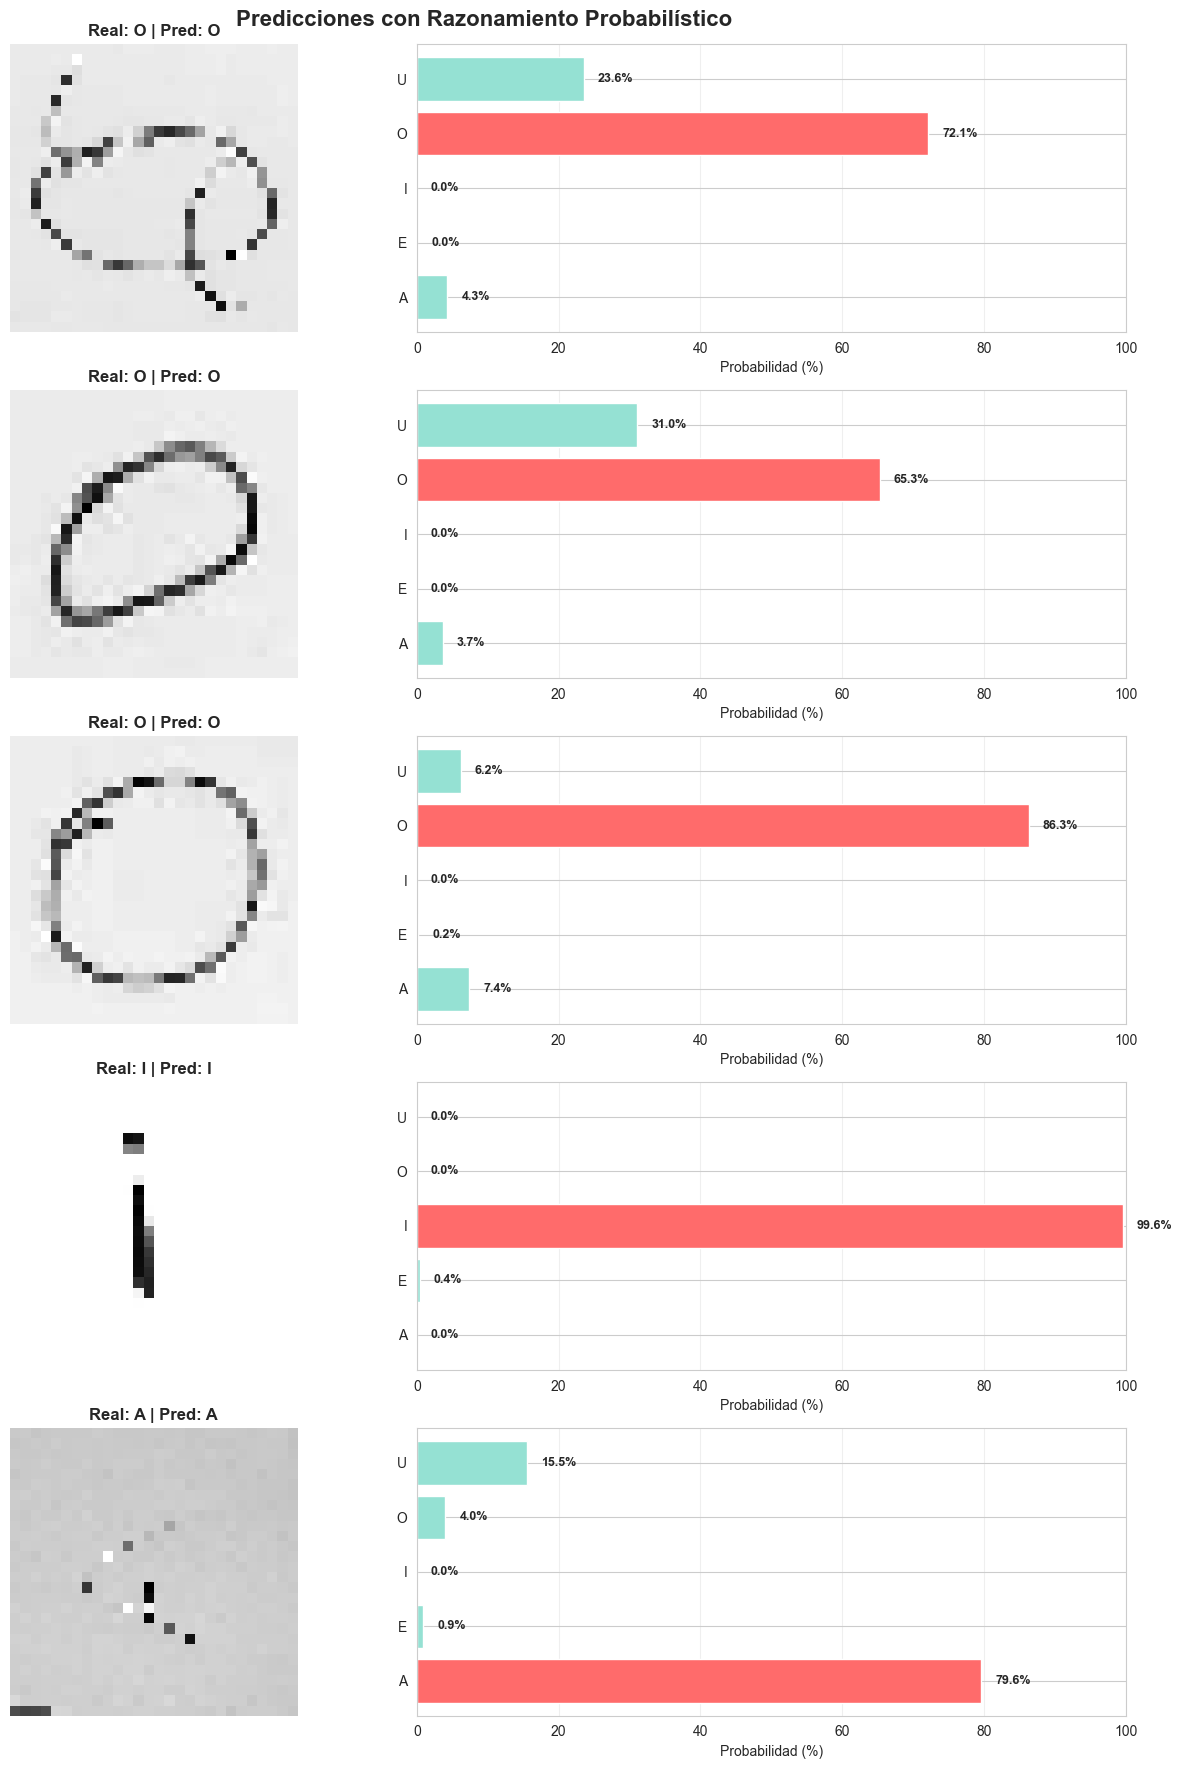

In [29]:
# Seleccionar 5 ejemplos aleatorios
indices_aleatorios = np.random.choice(len(X_test), 5, replace=False)

fig, axes = plt.subplots(5, 2, figsize=(14, 18))
fig.suptitle('Predicciones con Razonamiento Probabilístico', fontsize=16, fontweight='bold')

for idx, test_idx in enumerate(indices_aleatorios):
    # Imagen
    img = X_test[test_idx].reshape(28, 28)
    axes[idx, 0].imshow(img, cmap='gray')
    axes[idx, 0].axis('off')
    axes[idx, 0].set_title(f"Real: {etiquetas_nombres[y_test[test_idx]]} | "
                          f"Pred: {etiquetas_nombres[mejor_predicciones[test_idx]]}",
                          fontweight='bold')
    
    # Gráfico de probabilidades
    probs = probabilidades[test_idx]
    colores = ['#FF6B6B' if i == mejor_predicciones[test_idx] else '#95E1D3' 
               for i in range(5)]
    
    axes[idx, 1].barh(list(etiquetas_nombres.values()), probs * 100, color=colores)
    axes[idx, 1].set_xlabel('Probabilidad (%)', fontsize=10)
    axes[idx, 1].set_xlim(0, 100)
    axes[idx, 1].grid(axis='x', alpha=0.3)
    
    # Agregar valores
    for i, v in enumerate(probs):
        axes[idx, 1].text(v * 100 + 2, i, f'{v*100:.1f}%', 
                         va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

## 10. Análisis de Incertidumbre

Identificamos casos donde el modelo tiene dudas (probabilidades similares entre múltiples clases).

In [30]:
# Calcular diferencia entre las dos probabilidades más altas
prob_ordenadas = np.sort(probabilidades, axis=1)
diferencias = prob_ordenadas[:, -1] - prob_ordenadas[:, -2]

# Encontrar casos de mayor incertidumbre (diferencia pequeña)
indices_inciertos = np.argsort(diferencias)[:10]  # Top 10 casos más inciertos

print("CASOS DE MAYOR INCERTIDUMBRE\n")
print("(Cuando las probabilidades de las dos clases principales son muy cercanas)\n")

for i, idx in enumerate(indices_inciertos[:5], 1):
    # Obtener las dos clases con mayor probabilidad
    top2_indices = np.argsort(probabilidades[idx])[-2:][::-1]
    
    print(f"Caso {i}:")
    print(f"   Valor real: {etiquetas_nombres[y_test[idx]]}")
    print(f"   Predicción: {etiquetas_nombres[mejor_predicciones[idx]]}")
    print(f"   Dilema del agente:")
    print(f"      {etiquetas_nombres[top2_indices[0]]}: {probabilidades[idx][top2_indices[0]]*100:.2f}%")
    print(f"      {etiquetas_nombres[top2_indices[1]]}: {probabilidades[idx][top2_indices[1]]*100:.2f}%")
    print(f"   Diferencia: {diferencias[idx]*100:.2f}%")
    print(f"   Correcta: {'Sí' if mejor_predicciones[idx] == y_test[idx] else 'No'}")
    print()

CASOS DE MAYOR INCERTIDUMBRE

(Cuando las probabilidades de las dos clases principales son muy cercanas)

Caso 1:
   Valor real: U
   Predicción: U
   Dilema del agente:
      U: 36.99%
      E: 34.87%
   Diferencia: 2.12%
   Correcta: Sí

Caso 2:
   Valor real: A
   Predicción: O
   Dilema del agente:
      O: 41.05%
      A: 35.08%
   Diferencia: 5.97%
   Correcta: No

Caso 3:
   Valor real: U
   Predicción: U
   Dilema del agente:
      U: 43.06%
      A: 31.95%
   Diferencia: 11.10%
   Correcta: Sí

Caso 4:
   Valor real: U
   Predicción: U
   Dilema del agente:
      U: 41.84%
      E: 28.92%
   Diferencia: 12.93%
   Correcta: Sí

Caso 5:
   Valor real: I
   Predicción: E
   Dilema del agente:
      E: 58.29%
      I: 40.34%
   Diferencia: 17.95%
   Correcta: No



### 10.1 Visualización de Casos Inciertos

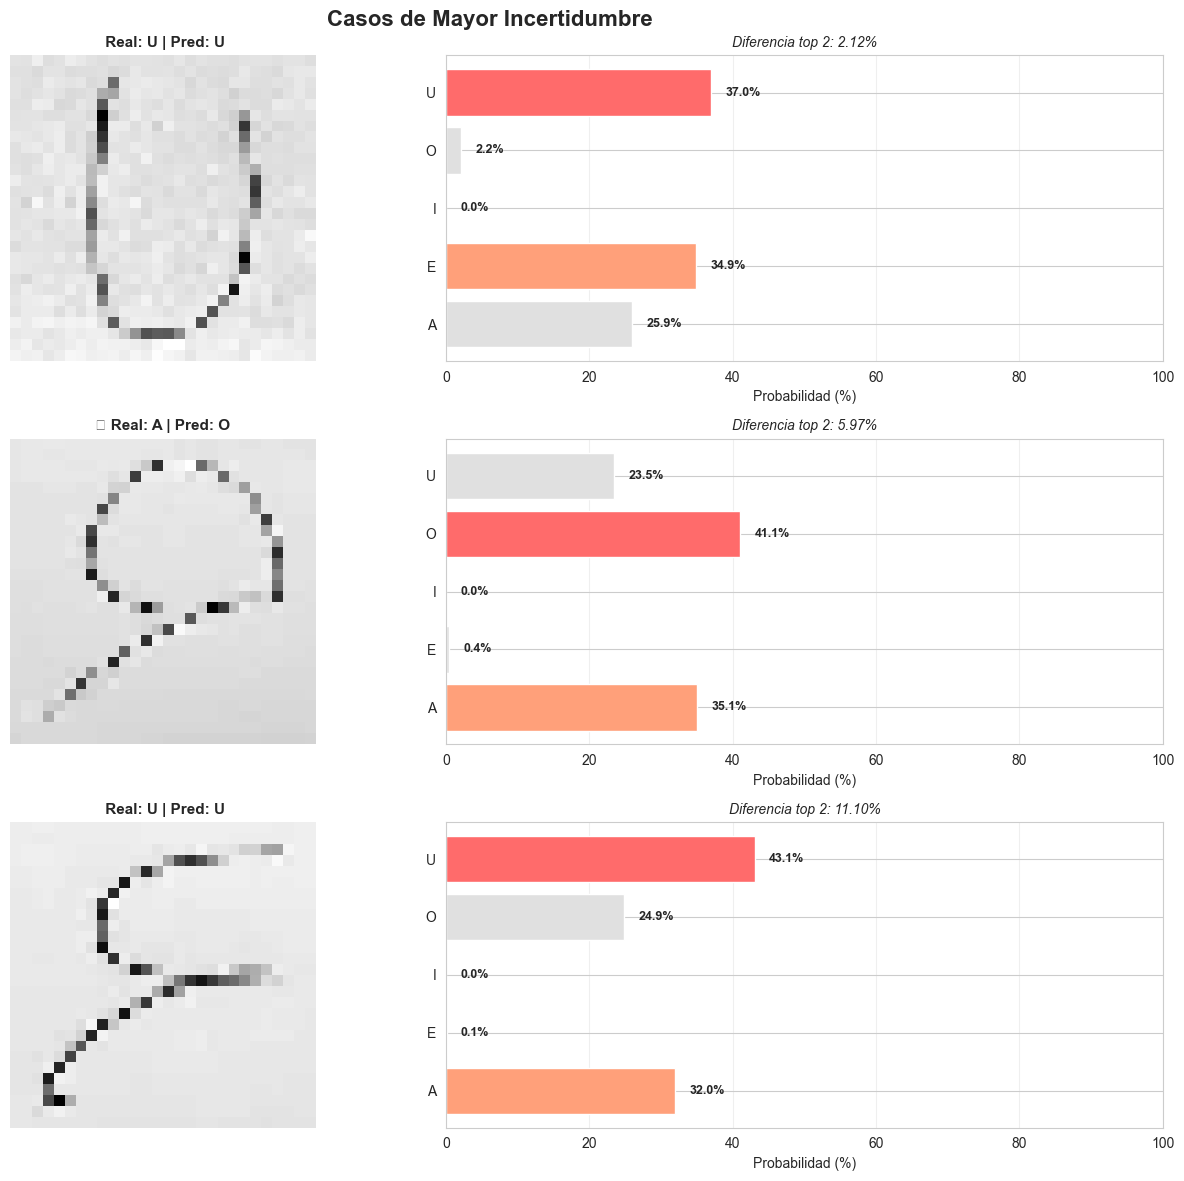

In [31]:
# Visualizar los 3 casos más inciertos
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Casos de Mayor Incertidumbre', fontsize=16, fontweight='bold')

for i, idx in enumerate(indices_inciertos[:3]):
    # Imagen
    img = X_test[idx].reshape(28, 28)
    axes[i, 0].imshow(img, cmap='gray')
    axes[i, 0].axis('off')
    
    es_correcto = '' if mejor_predicciones[idx] == y_test[idx] else '❌'
    axes[i, 0].set_title(f"{es_correcto} Real: {etiquetas_nombres[y_test[idx]]} | "
                        f"Pred: {etiquetas_nombres[mejor_predicciones[idx]]}",
                        fontweight='bold', fontsize=11)
    
    # Gráfico de probabilidades
    probs = probabilidades[idx]
    top2_indices = np.argsort(probs)[-2:][::-1]
    
    colores = ['#FF6B6B' if i == top2_indices[0] else 
               '#FFA07A' if i == top2_indices[1] else '#E0E0E0' 
               for i in range(5)]
    
    axes[i, 1].barh(list(etiquetas_nombres.values()), probs * 100, color=colores)
    axes[i, 1].set_xlabel('Probabilidad (%)', fontsize=10)
    axes[i, 1].set_xlim(0, 100)
    axes[i, 1].grid(axis='x', alpha=0.3)
    axes[i, 1].set_title(f"Diferencia top 2: {diferencias[idx]*100:.2f}%", 
                        fontsize=10, style='italic')
    
    # Agregar valores
    for j, v in enumerate(probs):
        axes[i, 1].text(v * 100 + 2, j, f'{v*100:.1f}%', 
                       va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

## 11. Guardar el Mejor Modelo

In [32]:
# Guardar modelo
modelo_guardado = f'modelo_{mejor_nombre.replace(" ", "_").lower()}.pkl'
joblib.dump(mejor_modelo, modelo_guardado)

# Guardar mapeo de etiquetas
joblib.dump(etiquetas_nombres, 'etiquetas_nombres.pkl')

print(f"Modelo guardado en: {modelo_guardado}")
print(f"Etiquetas guardadas en: etiquetas_nombres.pkl")
print(f"\nMétricas finales del modelo:")
print(f"   Precisión: {(acc_rf if mejor_nombre == 'Random Forest' else acc_lr)*100:.2f}%")
print(f"   Total de parámetros optimizados: {len(grid_search.best_params_) if mejor_nombre == 'Random Forest' else 'N/A'}")

Modelo guardado en: modelo_regresión_logística.pkl
Etiquetas guardadas en: etiquetas_nombres.pkl

Métricas finales del modelo:
   Precisión: 84.31%
   Total de parámetros optimizados: N/A


## 12. Resumen y Conclusiones

In [33]:
print("="*60)
print("RESUMEN DEL PROYECTO")
print("="*60)
print(f"\nRequerimientos Cumplidos:\n")
print("   1. ✓ Preprocesamiento: Imágenes convertidas a 28x28, normalizadas y aplanadas")
print("   2. ✓ Dos modelos entrenados: Regresión Logística y Random Forest")
print("   3. ✓ Optimización: Grid Search con validación cruzada")
print("   4. ✓ Matriz de confusión: Análisis de pares difíciles de distinguir")
print("   5. ✓ Razonamiento probabilístico: Probabilidades para las 5 clases")
print("   6. ✓ Análisis de incertidumbre: Casos con predicciones cercanas\n")

print("Resultados:\n")
print(f"   • Total de imágenes: {len(X)}")
print(f"   • Mejor modelo: {mejor_nombre}")
print(f"   • Precisión en test: {(acc_rf if mejor_nombre == 'Random Forest' else acc_lr)*100:.2f}%")
print(f"   • Validación cruzada: {(grid_search.best_score_ if mejor_nombre == 'Random Forest' else cv_scores_lr.mean())*100:.2f}%")

print("\nCapacidades del Agente:\n")
print("   • Clasificación de vocales manuscritas")
print("   • Cuantificación de confianza en cada predicción")
print("   • Identificación de casos ambiguos")
print("   • Razonamiento probabilístico sobre las 5 clases")

print(f"\nModelo guardado como: {modelo_guardado}")
print("\n" + "="*60)

RESUMEN DEL PROYECTO

Requerimientos Cumplidos:

   1. ✓ Preprocesamiento: Imágenes convertidas a 28x28, normalizadas y aplanadas
   2. ✓ Dos modelos entrenados: Regresión Logística y Random Forest
   3. ✓ Optimización: Grid Search con validación cruzada
   4. ✓ Matriz de confusión: Análisis de pares difíciles de distinguir
   5. ✓ Razonamiento probabilístico: Probabilidades para las 5 clases
   6. ✓ Análisis de incertidumbre: Casos con predicciones cercanas

Resultados:

   • Total de imágenes: 510
   • Mejor modelo: Regresión Logística
   • Precisión en test: 84.31%
   • Validación cruzada: 83.81%

Capacidades del Agente:

   • Clasificación de vocales manuscritas
   • Cuantificación de confianza en cada predicción
   • Identificación de casos ambiguos
   • Razonamiento probabilístico sobre las 5 clases

Modelo guardado como: modelo_regresión_logística.pkl



## 13. (OPCIONAL) Mejora: Data Augmentation

Para mejorar la generalización del modelo a imágenes nuevas, podemos generar variaciones de las imágenes existentes.

In [34]:
from scipy.ndimage import rotate, shift
from sklearn.utils import shuffle

def generar_variaciones(X, y, factor=3):
    """
    Genera variaciones de las imágenes para mejorar la generalización.
    
    Args:
        X: Imágenes originales aplanadas
        y: Etiquetas
        factor: Cuántas variaciones generar por imagen
    
    Returns:
        X_aumentado, y_aumentado
    """
    X_reshaped = X.reshape(-1, 28, 28)
    X_nuevo = []
    y_nuevo = []
    
    print(f"Generando {factor} variaciones por cada imagen...\n")
    
    for i, (img, label) in enumerate(zip(X_reshaped, y)):
        # Imagen original
        X_nuevo.append(img.flatten())
        y_nuevo.append(label)
        
        for _ in range(factor - 1):
            img_var = img.copy()
            
            # Rotación aleatoria (-15 a 15 grados)
            angulo = np.random.uniform(-15, 15)
            img_var = rotate(img_var, angulo, reshape=False, mode='nearest')
            
            # Desplazamiento aleatorio (-2 a 2 píxeles)
            dx = np.random.randint(-2, 3)
            dy = np.random.randint(-2, 3)
            img_var = shift(img_var, [dy, dx], mode='nearest')
            
            # Pequeño zoom (0.9 a 1.1)
            zoom_factor = np.random.uniform(0.9, 1.1)
            h, w = img_var.shape
            new_h, new_w = int(h * zoom_factor), int(w * zoom_factor)
            img_zoomed = cv2.resize(img_var, (new_w, new_h))
            
            # Re-centrar
            if zoom_factor > 1:
                # Recortar
                start_h = (new_h - h) // 2
                start_w = (new_w - w) // 2
                img_var = img_zoomed[start_h:start_h+h, start_w:start_w+w]
            else:
                # Pad
                pad_h = (h - new_h) // 2
                pad_w = (w - new_w) // 2
                img_var = np.pad(img_zoomed, 
                                ((pad_h, h-new_h-pad_h), (pad_w, w-new_w-pad_w)), 
                                mode='constant')
            
            # Asegurar tamaño correcto
            img_var = cv2.resize(img_var, (28, 28))
            
            X_nuevo.append(img_var.flatten())
            y_nuevo.append(label)
        
        if (i + 1) % 100 == 0:
            print(f"   Procesadas {i + 1}/{len(X)} imágenes...")
    
    X_aumentado = np.array(X_nuevo)
    y_aumentado = np.array(y_nuevo)
    
    # Mezclar
    X_aumentado, y_aumentado = shuffle(X_aumentado, y_aumentado, random_state=42)
    
    print(f"\nDataset aumentado:")
    print(f"   Original: {len(X)} imágenes")
    print(f"   Aumentado: {len(X_aumentado)} imágenes")
    print(f"   Factor de aumento: {len(X_aumentado) / len(X):.1f}x")
    
    return X_aumentado, y_aumentado

# Generar dataset aumentado
X_aug, y_aug = generar_variaciones(X, y, factor=3)

Generando 3 variaciones por cada imagen...

   Procesadas 100/510 imágenes...
   Procesadas 200/510 imágenes...
   Procesadas 300/510 imágenes...
   Procesadas 400/510 imágenes...
   Procesadas 200/510 imágenes...
   Procesadas 300/510 imágenes...
   Procesadas 400/510 imágenes...
   Procesadas 500/510 imágenes...

Dataset aumentado:
   Original: 510 imágenes
   Aumentado: 1530 imágenes
   Factor de aumento: 3.0x
   Procesadas 500/510 imágenes...

Dataset aumentado:
   Original: 510 imágenes
   Aumentado: 1530 imágenes
   Factor de aumento: 3.0x


### Visualización de imágenes aumentadas

Veamos algunos ejemplos de las variaciones generadas:

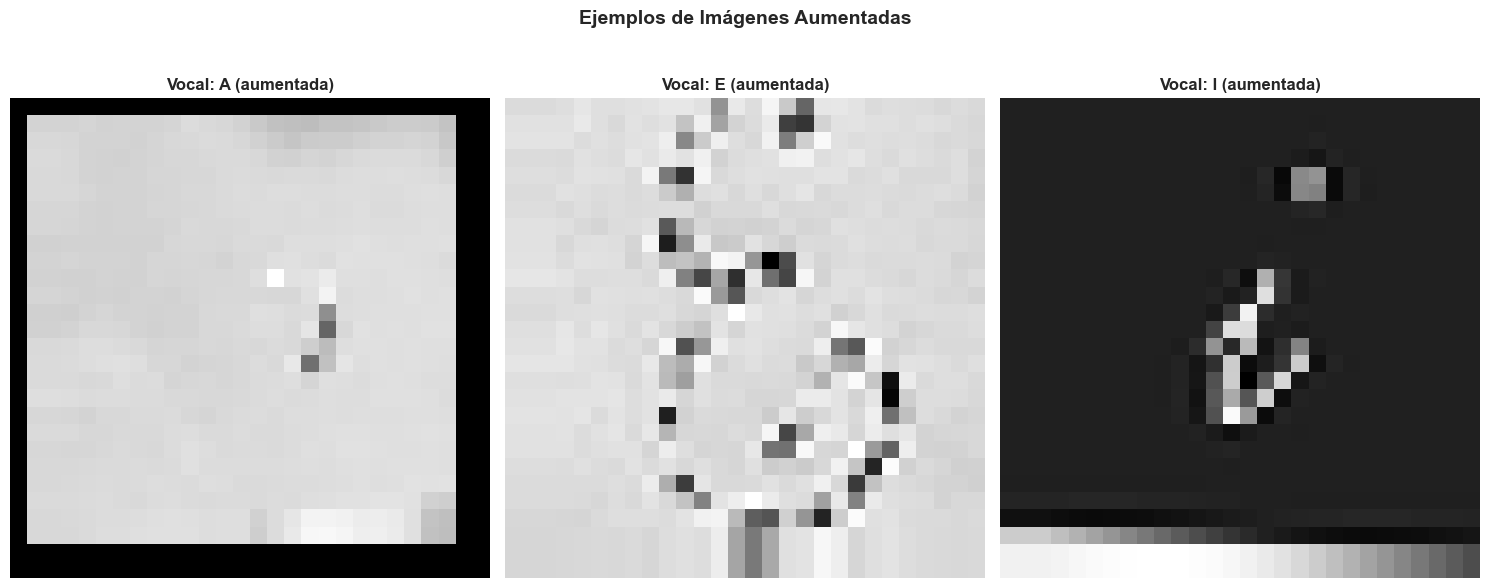


Distribución del dataset aumentado:
   A: 300 imágenes
   E: 300 imágenes
   I: 300 imágenes
   O: 318 imágenes
   U: 312 imágenes


In [35]:
# Visualizar ejemplos de data augmentation
plt.figure(figsize=(15, 6))

# Seleccionar 3 vocales aleatorias
for i in range(3):
    vocal_idx = np.random.choice(np.where(y_aug == i)[0])
    
    # Imagen aumentada
    img_aug = X_aug[vocal_idx].reshape(28, 28)
    
    plt.subplot(1, 3, i + 1)
    plt.imshow(img_aug, cmap='gray')
    vocal_nombres = {0: 'A', 1: 'E', 2: 'I', 3: 'O', 4: 'U'}
    plt.title(f"Vocal: {vocal_nombres[i]} (aumentada)", fontsize=12, fontweight='bold')
    plt.axis('off')

plt.suptitle("Ejemplos de Imágenes Aumentadas", fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"\nDistribución del dataset aumentado:")
vocal_nombres = {0: 'A', 1: 'E', 2: 'I', 3: 'O', 4: 'U'}
for vocal, count in zip(*np.unique(y_aug, return_counts=True)):
    print(f"   {vocal_nombres[vocal]}: {count} imágenes")

### Re-entrenamiento con dataset aumentado

Ahora vamos a re-entrenar el modelo de Regresión Logística con el dataset aumentado:

In [36]:
# Dividir dataset aumentado
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    X_aug, y_aug, test_size=0.2, random_state=42, stratify=y_aug
)

print("Dataset aumentado dividido:")
print(f"   Entrenamiento: {len(X_train_aug)} imágenes")
print(f"   Prueba: {len(X_test_aug)} imágenes\n")

# Re-entrenar modelo de Regresión Logística
print("Re-entrenando Regresión Logística con dataset aumentado...\n")
modelo_rl_aug = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
modelo_rl_aug.fit(X_train_aug, y_train_aug)

# Evaluar
y_pred_aug = modelo_rl_aug.predict(X_test_aug)
accuracy_aug = accuracy_score(y_test_aug, y_pred_aug)
vocal_nombres = ['A', 'E', 'I', 'O', 'U']
reporte_aug = classification_report(y_test_aug, y_pred_aug, target_names=vocal_nombres)

print(f"MODELO RE-ENTRENADO CON DATA AUGMENTATION")
print(f"   Precisión en conjunto de prueba: {accuracy_aug * 100:.2f}%\n")
print("Reporte de clasificación detallado:\n")
print(reporte_aug)

# Validación cruzada
print("\nRealizando validación cruzada (5-fold)...")
cv_scores_aug = cross_val_score(modelo_rl_aug, X_aug, y_aug, cv=5, scoring='accuracy')
print(f"   Precisión promedio (CV): {cv_scores_aug.mean() * 100:.2f}%")
print(f"   Desviación estándar: {cv_scores_aug.std() * 100:.2f}%")

Dataset aumentado dividido:
   Entrenamiento: 1224 imágenes
   Prueba: 306 imágenes

Re-entrenando Regresión Logística con dataset aumentado...

MODELO RE-ENTRENADO CON DATA AUGMENTATION
   Precisión en conjunto de prueba: 73.53%

Reporte de clasificación detallado:

              precision    recall  f1-score   support

           A       0.75      0.68      0.71        60
           E       0.74      0.97      0.84        60
           I       0.97      0.65      0.78        60
           O       0.70      0.84      0.77        64
           U       0.59      0.53      0.56        62

    accuracy                           0.74       306
   macro avg       0.75      0.74      0.73       306
weighted avg       0.75      0.74      0.73       306


Realizando validación cruzada (5-fold)...
MODELO RE-ENTRENADO CON DATA AUGMENTATION
   Precisión en conjunto de prueba: 73.53%

Reporte de clasificación detallado:

              precision    recall  f1-score   support

           A       0.7

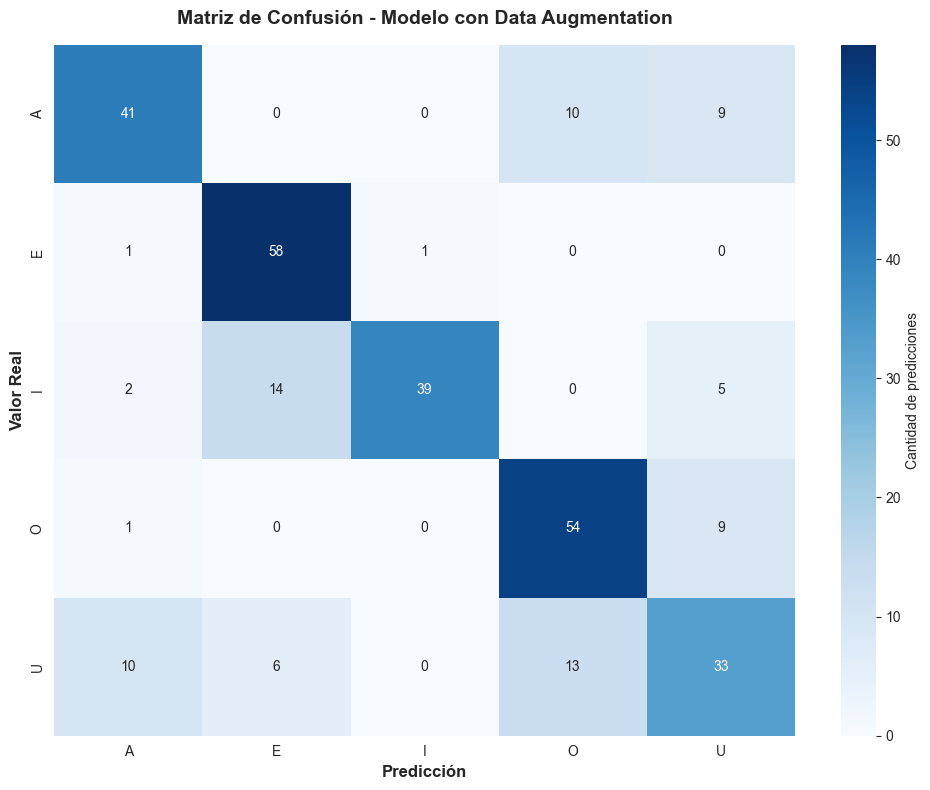


Modelo mejorado con 1530 imágenes (factor 3x)
   Precisión: 73.53%


In [37]:
# Matriz de confusión del modelo aumentado
cm_aug = confusion_matrix(y_test_aug, y_pred_aug)
vocal_nombres = ['A', 'E', 'I', 'O', 'U']

plt.figure(figsize=(10, 8))
sns.heatmap(cm_aug, annot=True, fmt='d', cmap='Blues', 
            xticklabels=vocal_nombres,
            yticklabels=vocal_nombres,
            cbar_kws={'label': 'Cantidad de predicciones'})
plt.title('Matriz de Confusión - Modelo con Data Augmentation', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Predicción', fontsize=12, fontweight='bold')
plt.ylabel('Valor Real', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nModelo mejorado con {len(X_aug)} imágenes (factor 3x)")
print(f"   Precisión: {accuracy_aug * 100:.2f}%")

### Guardar modelo mejorado

Vamos a guardar el modelo re-entrenado para usarlo en la interfaz:

In [38]:
# Guardar el modelo mejorado
import pickle

with open('modelo_regresión_logística.pkl', 'wb') as archivo:
    pickle.dump(modelo_rl_aug, archivo)

print("Modelo mejorado guardado exitosamente como 'modelo_regresión_logística.pkl'")
print(f"   Este modelo está entrenado con {len(X_aug)} imágenes (con augmentation)")
print(f"   Precisión: {accuracy_aug * 100:.2f}%")


Modelo mejorado guardado exitosamente como 'modelo_regresión_logística.pkl'
   Este modelo está entrenado con 1530 imágenes (con augmentation)
   Precisión: 73.53%
